# Подготовка к лабораторной работе 1.

Моделирование процессов дескритизации и восстановление аналогового сигнала.
1. __*Теоретическая часть*__

    В  устройстве  цифровой  обработки  сигналов  ( УЦОС)  входными  воздействиями  могут  быть  как аналоговые,  так  и  цифровые  сигналы. На  рис.  1.1  приведена  структурная  схема  УЦОС, осуществляющего  циф-
    ровую обработку аналоговых сигналов. 
    
    
    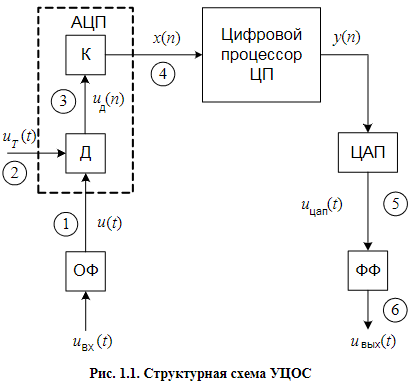

    ### Алгоритм обработка сигнала

    1. Аналоговый  сигнал  $Uвх(t)$,  поступающий  на  вход  устройства,  проходит  через ___ограничивающий 
    фильтр  ОФ___,  в  котором  происходит  подавление  колебаний,  частоты  которых  превосходят  значение 
    верхней  ( максимальной) частоты  $fв$  спектра  аналогового  обрабатываемого  сигнала. 

    2. Напряжение с выхода ограничивающего фильтра поступает на аналого-цифровой преобразователь (АЦП). В АЦП осуществляется дискретизация аналогового сигнала по времени, ее выполняет дискретизатор __Д__, а также по уровню, ее выполняет квантователь __К__. В результате этих операций аналоговый  
    сигнал преобразуется в последовательность цифровых отсчетов

    3. Дискретизатор  работает  как  ключ,  управляемый  последовательностью  импульсов  $U_T(t)$. 
    Период  их  повторения  T  называется  __интервалом  дискретизации__,  он  связан  с  частотой 
    дискретизации fД соотношением $T = 1/fД $.

    4. Цифровая  последовательность  x(n) с  выхода  квантователя  поступает  на  __цифровой  процессор  ЦП__, который  работает  по  программе,  обеспечивающей  необходимую  линейную  обработку  ( фильтрацию).  В 
    результате  фильтрации  на  выходе  ЦП  образуется  цифровая  последовательность  $y(n)$. Последователь-
    ность  $y(n)$ можно  сохранить  в  памяти  ЦП  или  вывести  из  ЦП  с  целью  преобразования  в  аналоговый сигнал − восстановления аналогового сигнала. 
                                

 
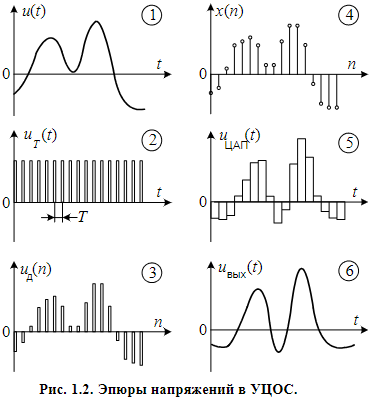 

*Рис 1.2* ___Графики состояний сигнала на разных этапах обработки___  

--------

### Примечание

Так как в процессе дискретизации аналоговый сигнал заменяется отсчетами, взятыми через интервал дискретизации T, то весьма важным является правильный выбор значения этого интервала. 
        
__При увеличении T__  - может оказаться, что в паузах между последовательными отсчетами аналоговый сигнал заметно меняется, и это может привести к потере информации. 
        
__При уменьшении T дискретный__  - сигнал  точнее  соответствует  исходному  аналоговому,  так  как  при  уменьшении  длительности  паузы  между последовательными  отсчетами  разница  между  значениями  отсчетов  также  уменьшается.
  
___Однако___!  при  сокращении длительности T  необходимо также сокращать время обработки текущего отсчета в цифровом процессоре, так как оно не должно превышать значения T. Таким образом, уменьшение T может потребовать увеличения  скорости  обработки  сигнала  в  цифровом  процессоре,  что  не  всегда  возможно.

*__Правильным  следует считать  такое    значение    T__,  при  котором  обеспечивается  восстановление  исходного  аналогового  сигнала  по совокупности  его  дискретных  отсчетов.  Это  значение  определяется  на  основании  теоремы  Котельникова (теоремы  отсчетов).  В  соответствии  с  теоремой  отсчетов  минимальное  значение  fД  должно  удовлетворять равенству:* 

   $fд = 2fв$  

----------------------------------------------

#### _Интервал_ _Найквиста!_ 
    Это диапазон частот, в пределах которого можно точно восстанавливать сигнал после его дискретизации, без потерь информации и искажений. Этот интервал ограничен половиной частоты дискретизации 

 Формально он лежит в диапазоне:
 $[0;fd/2]$

 Граница $[0;fd/2]$  называется - __частотой Найквиста__.

#### _Теорема Найквиста-Шеннона:_
Для того чтобы сигнал мог быть точно восстановлен после дискретизации, его частота должна быть меньше или равна половине частоты дискретизации. Это требование теоремы Найквиста-Шеннона гласит:

$fсигнала <= fd/2$

#### _Пример_ 

Если сигнал имеет частоты выше $fd/2$, то при дискретизации возникает явление, называемое алиасингом (наложение спектров). Это приводит к тому, что высокие частоты "отображаются" как более низкие частоты в интервале Найквиста.

-----

2. Постройте  спектры  дискретных  сигналов,  полученных  путем  дискретизации  с  частотой  fД  =  1000  Гц 
следующих аналоговых сигналов:

а) $s1(t) = U0 + Um sin(2πf t ), где U0 = 1 В, Um = 1 В,  f = 100 Гц.$ 

In [1]:
# Подключение необходимых библиотек 
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

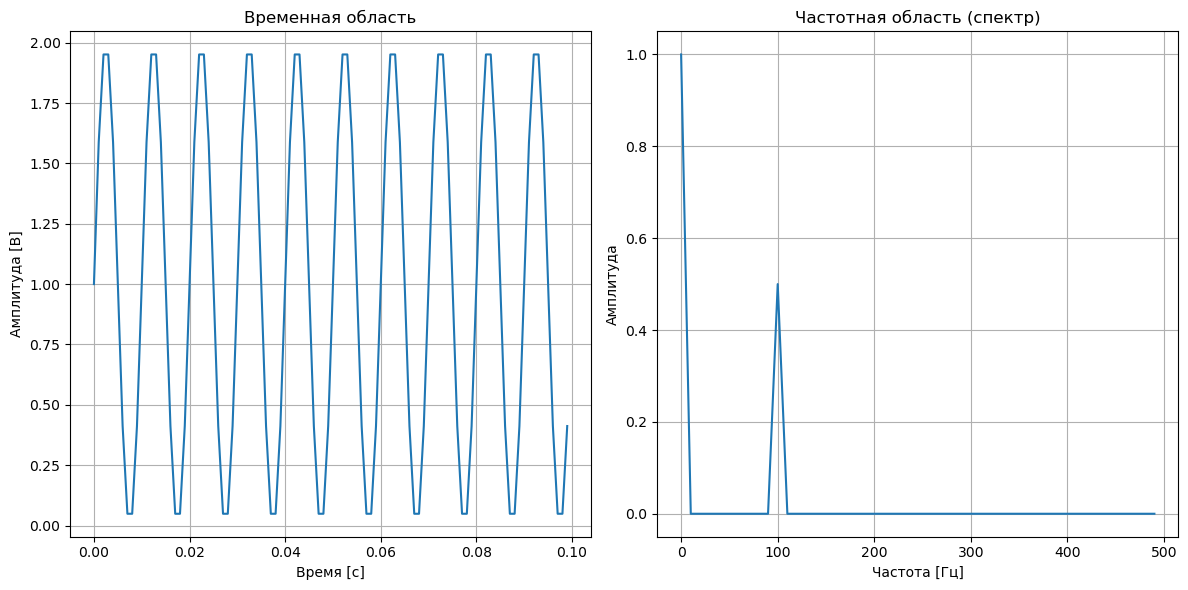

In [7]:
# Параметры сигнала
U0 = 1  # Постоянная составляющая
Um = 1  # Амплитуда синусоидального сигнала
f = 100  # Частота сигнала, Гц
fD = 1000  # Частота дискретизации, Гц
T = 0.1  # Длительность сигнала, с
N = int(T * fD)  # Количество точек

# Временная шкала
t = np.linspace(0, T, N, endpoint=False)

# Сигнал s1(t)
s1 = U0 + Um * np.sin(2 * np.pi * f * t)

# Преобразование Фурье (FFT)
S1_fft = np.fft.fft(s1)
S1_fft = np.abs(S1_fft) / N  # Модуль и нормализация

# Частоты, соответствующие результатам FFT
freqs = np.fft.fftfreq(N, 1 / fD)

# Построение графиков
plt.figure(figsize=(12, 6))

# График сигнала во временной области
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(t, s1)
plt.title('Временная область')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда [В]')

# График сигнала в частотной области (спектр)
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(freqs[:N // 2], S1_fft[:N // 2])  # Отображаем только положительные частоты
plt.title('Частотная область (спектр)')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.tight_layout()
plt.show()

б)  $s2(t)  =  Um1 sin(2πf1t)  +  Um2 sin(2πf2t + π)  +  Um3 sin(2πf3t),    где  f1 = 100 Гц,    f2 = 200 Гц,    f3 = 400 Гц, 
Um1 = 1 В, Um2 = 0,5 В, Um3 = 0,25 В.$

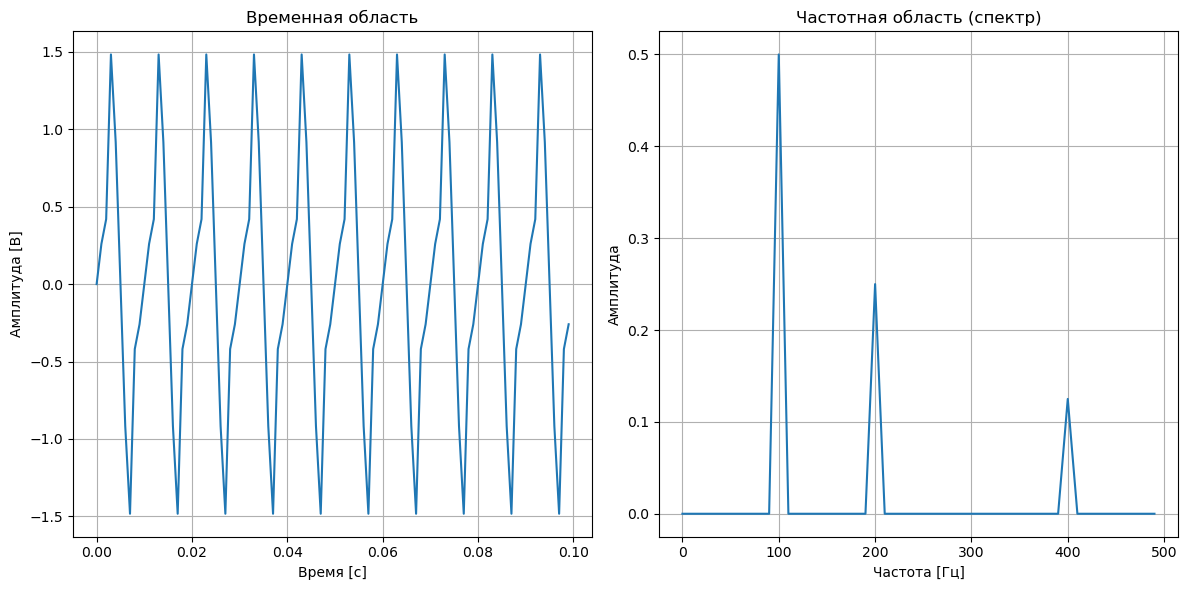

In [10]:
# Параметры сигнала
Um1 = 1  # Амплитуда первого сигнала
Um2 = 0.5  # Амплитуда второго сигнала
Um3 = 0.25  # Амплитуда третьего сигнала

f1 = 100  # Частота первого сигнала, Гц
f2 = 200  # Частота второго сигнала, Гц
f3 = 400  # Частота третьего сигнала, Гц

fD = 1000  # Частота дискретизации, Гц
T = 0.1  # Длительность сигнала, с
N = int(T * fD)  # Количество точек

# Временная шкала
t = np.linspace(0, T, N, endpoint=False)

# Сигнал s2(t)
s2 = Um1 * np.sin(2 * np.pi * f1 * t) + Um2 * np.sin(2 * np.pi * f2 * t + np.pi) + Um3 * np.sin(2 * np.pi * f3 * t)

# Преобразование Фурье (FFT)
S2_fft = np.fft.fft(s2)
S2_fft = np.abs(S2_fft) / N  # Модуль и нормализация

# Частоты, соответствующие результатам FFT
freqs = np.fft.fftfreq(N, 1 / fD)

# Построение графиков
plt.figure(figsize=(12, 6))

# График сигнала во временной области
plt.subplot(1, 2, 1)
plt.plot(t, s2)

plt.title('Временная область')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда [В]')
plt.grid(True)

# График сигнала в частотной области (спектр)
plt.subplot(1, 2, 2)
plt.plot(freqs[:N // 2], S2_fft[:N // 2])  # Отображаем только положительные частоты
plt.title('Частотная область (спектр)')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.tight_layout()
plt.show()



3. Полагая, что частота дискретизации fД = 1000 Гц, изобразите спектр дискретного сигнала для следующих случаев: 

а) частота входного колебания f1 = 800 Гц 

б) частота входного колебания f3 = 600 Гц 

Определите максимальную частоту спектра в пределах интервала Найквиста.

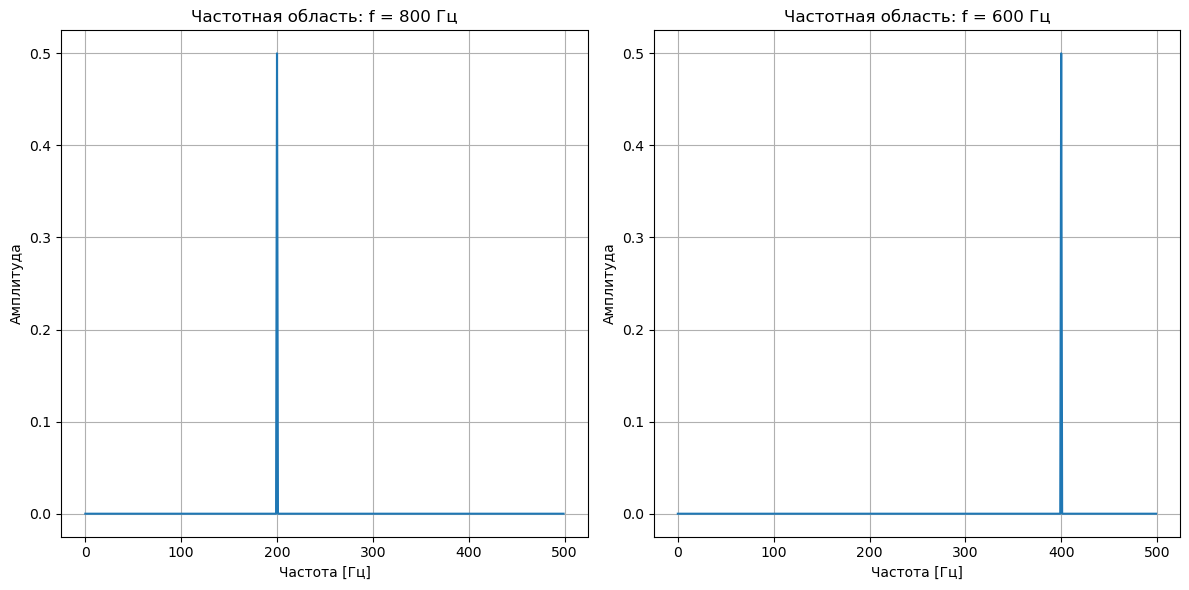

In [4]:
# Параметры сигнала
fD = 1000  # Частота дискретизации, Гц
T = 1  # Длительность сигнала, с
N = int(T * fD)  # Количество точек

# Временная шкала
t = np.linspace(0, T, N, endpoint=False)

# Функция для вычисления и отображения спектра сигнала
def plot_spectrum(frequency, ax):
    # Сигнал с заданной частотой
    signal = np.sin(2 * np.pi * frequency * t)
    
    # Преобразование Фурье (FFT)
    fft_signal = np.fft.fft(signal)
    fft_signal = np.abs(fft_signal) / N  # Модуль и нормализация
    
    # Частоты, соответствующие результатам FFT
    freqs = np.fft.fftfreq(N, 1 / fD)
    
    # Отображение спектра
    ax.plot(freqs[:N // 2], fft_signal[:N // 2])
    ax.set_title(f'Частотная область: f = {frequency} Гц')
    ax.set_xlabel('Частота [Гц]')
    ax.set_ylabel('Амплитуда')
    ax.grid(True)

# Создание графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Случай а) частота входного колебания f1 = 800 Гц
plot_spectrum(800, axes[0])

# Случай б) частота входного колебания f3 = 600 Гц
plot_spectrum(600, axes[1])

plt.tight_layout()
plt.show()

4. Определите такие номиналы элементов R1 и C1 сглаживающего фильтра, чтобы его частота среза равнялась  максимальной  частоте  спектра,  найденной  в  предыдущем  пункте.  Рекомендуется  задать  сопротивление резистора равным 10 ... 100 кОм, а емкость конденсатора рассчитать, исходя из частоты среза. 

Для расчета сглаживающего фильтра (например, RC-фильтра низких частот), частота среза $fc$ определяется по формуле:
$fc = \frac {1}{2*pi*R1*C1}$, где

*$fc$— частота среза,

​
-$R1$— сопротивление резистора,

​
-$C1$— ёмкость конденсатора.

In [20]:
# Вычисление ёмкости
import numpy as np
def capacity (f,R):
    C = 1 / (2 * np.pi * R * f)
    return C
R1 = 10e3  # Сопротивление, 10 кОм
fc = 500  # Частота среза, 500 Гц

capacity(R = R1,f = fc)

tau_1 = R1 * 31*10**(-9)
tau_1 * 10





0.0031

Для заданного сопротивления 10кОм и частоты среза 500Гц можно использовать ёмкость 31нФ

0.378 пФ - ёмкость, при котрой постоянная времени цепи увеличивается в 10 раз